In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('UniversalBank.csv')

In [31]:
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [32]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']


In [33]:
# Handle categorical variables if any (Assuming there's a 'CD Account' column that might need encoding)
# X = pd.get_dummies(X, drop_first=True)
# Step 3: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
svm = SVC(kernel='linear')  # You can experiment with different kernels (e.g., 'rbf')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
# Step 6: Make predictions
y_pred = svm.predict(X_test)

In [37]:
# Step 7: Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.20%


In [38]:
# Display classification report
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       895
           1       0.91      0.60      0.72       105

    accuracy                           0.95      1000
   macro avg       0.93      0.80      0.85      1000
weighted avg       0.95      0.95      0.95      1000



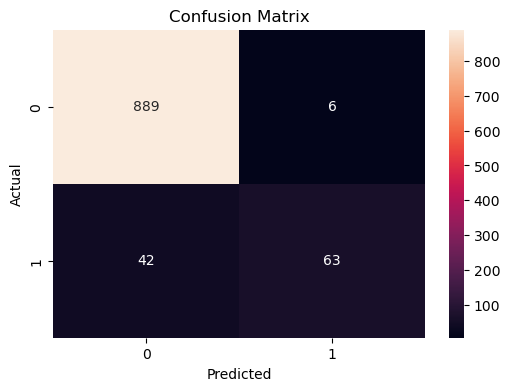

In [39]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()